In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

## Data

In [ ]:
train_2020_2021 = pd.read_csv("/content/drive/MyDrive/FC_Project/data/Train_JF.csv")
train_2022 = pd.read_csv("/content/drive/MyDrive/FC_Project/data/Test_JF.csv")

In [ ]:
train_2022 = train_2022.sort_index(axis=0,ascending=False)
train_2022

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
76,76,600143.SH,20220104,12.51,12.75,12.48,12.74,12.58,0.16,1.2719,203235.91,257068.017
75,75,600143.SH,20220105,12.72,12.91,12.61,12.67,12.74,-0.07,-0.5495,231187.15,294695.794
74,74,600143.SH,20220106,12.70,12.94,12.70,12.82,12.67,0.15,1.1839,221747.63,284397.707
73,73,600143.SH,20220107,12.92,13.28,12.83,13.05,12.82,0.23,1.7941,431736.05,565937.748
72,72,600143.SH,20220110,13.11,13.15,12.89,13.02,13.05,-0.03,-0.2299,225744.97,293749.968
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403
3,3,600143.SH,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075
2,2,600143.SH,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511
1,1,600143.SH,20220428,8.04,8.18,7.82,7.91,8.07,-0.16,-1.9827,175931.37,140145.987


In [ ]:
train_2020_2021 = train_2020_2021.sort_index(axis=0,ascending=False)
train_2020_2021

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,485,600143.SH,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230
484,484,600143.SH,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193
483,483,600143.SH,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780
482,482,600143.SH,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162
481,481,600143.SH,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20211227,12.31,12.46,12.24,12.44,12.30,0.14,1.1382,147513.84,182760.320
3,3,600143.SH,20211228,12.48,13.30,12.44,12.84,12.44,0.40,3.2154,535992.92,694366.482
2,2,600143.SH,20211229,12.71,12.96,12.66,12.78,12.84,-0.06,-0.4673,225369.38,288456.413
1,1,600143.SH,20211230,12.70,12.77,12.60,12.61,12.78,-0.17,-1.3302,226973.80,287781.101


In [ ]:
train = pd.concat([train_2020_2021, train_2022], axis=0)
train

,Unnamed: 0,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
485,485,600143.SH,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230
484,484,600143.SH,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193
483,483,600143.SH,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780
482,482,600143.SH,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162
481,481,600143.SH,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697
...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,600143.SH,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403
3,3,600143.SH,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075
2,2,600143.SH,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511
1,1,600143.SH,20220428,8.04,8.18,7.82,7.91,8.07,-0.16,-1.9827,175931.37,140145.987


## Data Preprocessing

### Handle Nulls

In [ ]:
train = train.drop("Unnamed: 0", axis=1)
train = train.drop("ts_code", axis=1)
train = train.dropna()
train.isnull().sum()
train.reset_index(inplace=True)
train = train.drop("index", axis=1)

### Add Target

In [ ]:
target = train['close'][1:]
train = train[:-1]
train['target'] = list(target)
train_save = train
train

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,7.79
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,7.91
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,8.07
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,7.91


### Test & Train Split

In [ ]:
test = train[-100:]
train = train[:-100]

### Cross Validation Split

In [ ]:
def setup_cv(df, splits=5):
    df['fold'] = -1
    # df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    num_bins = int(np.floor(1 + np.log2(len(df))))
    df.loc[:, "bins"] = pd.cut(
        df["target"], bins=num_bins, labels=False
    )

    kf = StratifiedKFold(n_splits=splits)
    for f, (t_, v_) in enumerate(kf.split(X=df, y=df.bins.values)):
            df.loc[v_, 'fold'] = f

    df = df.drop("bins", axis=1)
    return df

In [ ]:
train = setup_cv(train)
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target,fold
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53,0
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55,0
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67,0
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04,0
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,20211123,13.19,13.23,12.93,13.04,13.22,-0.18,-1.3616,362576.21,474241.331,12.97,4
458,20211124,12.98,13.09,12.92,12.97,13.04,-0.07,-0.5368,238659.81,309873.783,12.90,4
459,20211125,12.97,12.98,12.80,12.90,12.97,-0.07,-0.5397,260155.42,335108.958,12.86,4
460,20211126,12.86,12.96,12.73,12.86,12.90,-0.04,-0.3101,241656.83,310091.396,12.72,4


## LGBM Model Design

In [ ]:
X_train = train.loc[:, train.columns != 'target']

In [ ]:
X_train = train.loc[:, train.columns != 'target']
y_train = train[["target"]]

In [ ]:
import lightgbm as lgb
# lgb.summary()
# keras.utils.plot_model(lgb, show_shapes=True)

## Train Model

In [ ]:
N_FOLD = 5
seed0=2021
# params = {
#     'objective': 'rmse',
#     'boosting_type': 'gbdt',
#     'max_depth': -1,
#     'max_bin':100,
#     'min_data_in_leaf':500,
#     'learning_rate': 0.05,
#     'subsample': 0.72,
#     'subsample_freq': 4,
#     'feature_fraction': 0.5,
#     'lambda_l1': 0.5,
#     'lambda_l2': 1.0,
#     'categorical_column':[0],
#     'seed':seed0,
#     'feature_fraction_seed': seed0,
#     'bagging_seed': seed0,
#     'drop_seed': seed0,
#     'data_random_seed': seed0,
#     'n_jobs':-1,
#     'verbose': 10}

params = {
    'objective': 'rmse',
    'boosting_type': 'gbdt',
    'max_depth': -1,
    'max_bin':100,
    'learning_rate': 0.05,
    'subsample': 0.72,
    'subsample_freq': 4,
    'feature_fraction': 0.5,
    'lambda_l1': 0.5,
    'lambda_l2': 1.0,
    'categorical_column':[0],
    'seed':seed0,
    'feature_fraction_seed': seed0,
    'bagging_seed': seed0,
    'drop_seed': seed0,
    'data_random_seed': seed0,
    'n_jobs':-1,
    'verbose': 10}

In [ ]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))

def feval_rmspe(y_pred, y_true):
    return 'RMSPE', rmspe(y_true, y_pred), False

In [ ]:
def train_lgbm(train, folds):
    models = list()
    
    for f in range(folds):
        X_train = train[train.fold != f].loc[:, train.columns != 'target']
        X_train = X_train.loc[:, X_train.columns != 'fold']
        y_train = train[train.fold != f][["target"]]
        
        X_valid = train[train.fold == f].loc[:, train.columns != 'target']
        X_valid = X_valid.loc[:, X_valid.columns != 'fold']
        y_valid = train[train.fold == f][["target"]]

        train_dataset = lgb.Dataset(X_train, label=y_train)
        valid_dataset = lgb.Dataset(X_valid, label=y_valid)

        model = lgb.train(params = params,
                          num_boost_round=1000,
                          train_set = train_dataset, 
                          valid_sets = [train_dataset, valid_dataset], 
                          verbose_eval = 100,
                          early_stopping_rounds=10000)

        oof_preds = model.predict(X_valid)
        oof_score = np.sqrt(mean_squared_error(y_valid, oof_preds))
        print("oof_score of Validation Data is: ", oof_score)
        models.append(model)
    
    return models

In [ ]:
lgbm_models = train_lgbm(train, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.634308	valid_1's rmse: 0.78941
[200]	training's rmse: 0.545814	valid_1's rmse: 0.796937
[300]	training's rmse: 0.497196	valid_1's rmse: 0.804324
[400]	training's rmse: 0.458891	valid_1's rmse: 0.835135
[500]	training's rmse: 0.424206	valid_1's rmse: 0.84239
[600]	training's rmse: 0.397521	valid_1's rmse: 0.858052
[700]	training's rmse: 0.376479	valid_1's rmse: 0.857772
[800]	training's rmse: 0.356566	valid_1's rmse: 0.862848
[900]	training's rmse: 0.338726	valid_1's rmse: 0.876927
[1000]	training's rmse: 0.322514	valid_1's rmse: 0.88308
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.322514	valid_1's rmse: 0.88308
oof_score of Validation Data is:  0.8830797075929607
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.617542	valid_1's rmse: 0.832219
[200]	training's rmse: 0.51828	valid_1's rmse: 0.81565
[300]	training's rmse: 0.463524	

In [ ]:
i = 1
for model in lgbm_models:
    if i == 1:
      lgb.create_tree_digraph(model, tree_index=0)
      i = 0

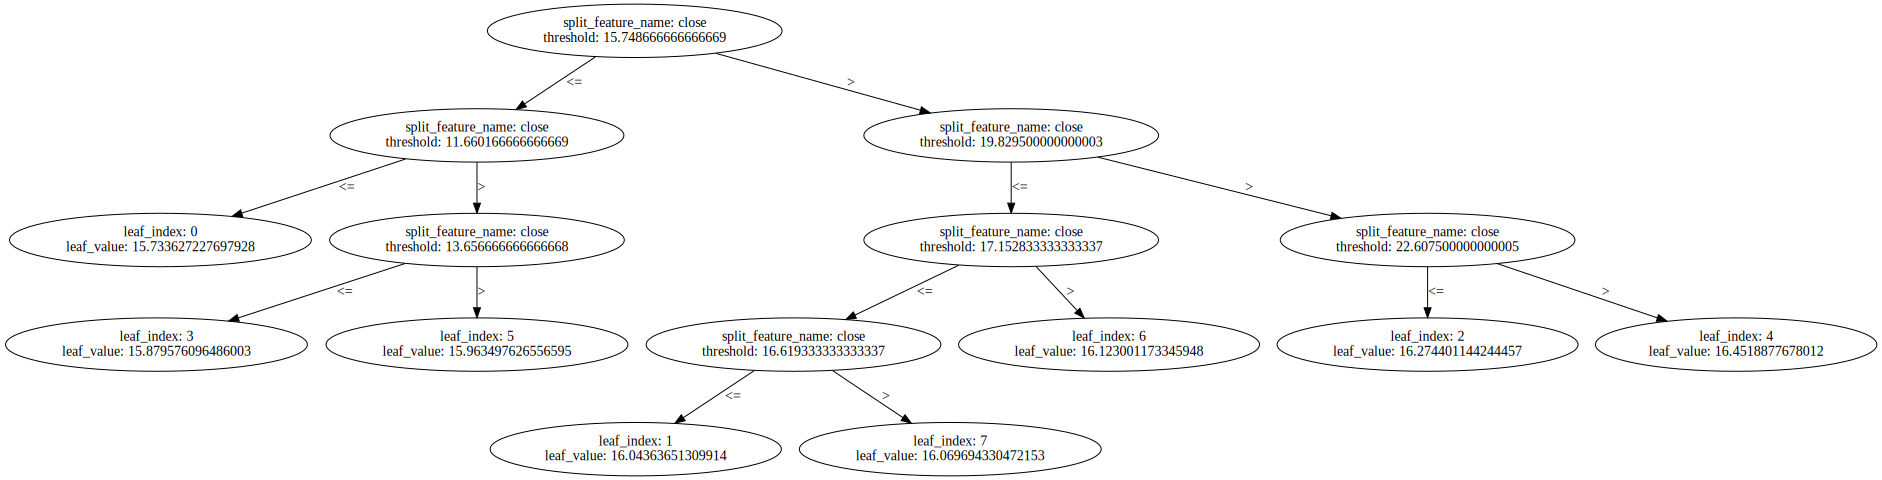

In [ ]:
lgb.create_tree_digraph(lgbm_models[2])

## Make Prediction

In [ ]:
X_test = test.loc[:, test.columns != 'target']
y_test = test[["target"]]

In [ ]:
lgbm_preds = list()

for model in lgbm_models:
    lgbm_preds.append(model.predict(X_test))
print(lgbm_preds)
lgbm_preds = np.mean(lgbm_preds, axis=0)

[array([13.49454446, 14.24245063, 14.0212252 , 13.82427295, 13.44033372,
       13.53959438, 13.22827837, 13.28910372, 13.18091266, 13.29360798,
       13.08224   , 13.30629514, 13.16216122, 13.07907683, 12.8907153 ,
       12.88905044, 12.66643239, 12.51123302, 12.43927817, 12.62430165,
       12.60825824, 12.73729794, 12.68523021, 12.51106614, 12.83820821,
       12.70182018, 12.89610628, 13.46542082, 12.80397263, 12.75379876,
       12.65056044, 12.57733647, 12.69366592, 13.04703139, 12.88596113,
       12.82364495, 12.70803273, 12.36698985, 12.31564718, 11.51228115,
       11.7604681 , 11.53182446, 11.62662977, 10.44224692, 10.67312246,
       10.80497908, 10.67866095, 10.59251538, 10.65980252, 10.42518587,
       11.08409538, 10.81269656, 11.01389322, 10.82255706, 10.55688086,
       10.61003778, 11.1380377 , 10.76271562, 10.77683759, 10.6665951 ,
       10.42518587, 11.99437648, 11.3161292 , 11.61673891, 11.11416148,
        9.90000559, 10.16341446,  9.98584996, 10.22187658,  9.8

In [ ]:
y_test_test = y_test.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
462,13.77,13.473898
463,13.89,13.985951
464,13.69,14.131632
465,13.43,13.852776
466,13.60,13.363136
...,...,...
557,7.79,8.289604
558,7.91,8.071385
559,8.07,8.063043
560,7.91,8.162500


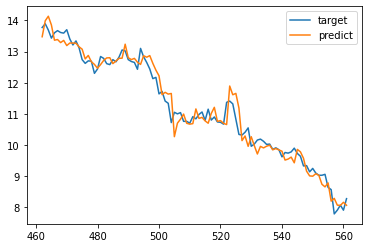

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_test,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_test,lgbm_preds))
print("r2_score is : ", r2_score(y_test,lgbm_preds))

mean_squared_error is :  0.09568249462215539
mean_absolute_error is :  0.23730041783192568
r2_score is :  0.9631478834138677


## Rolling Window

### Rolling with window 3

In [ ]:
train_rolling_3 = train_save.rolling(window=3).mean()
train_rolling_3.dropna(inplace=True)
train_rolling_3.reset_index(inplace=True)
train_rolling_3.drop("index", axis=1,inplace=True)
train_rolling_3

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020010e+07,7.423333,7.696667,7.366667,7.523333,7.433333,0.090000,1.228067,478180.990000,359357.734333,7.583333
1,2.020011e+07,7.500000,7.746667,7.453333,7.583333,7.523333,0.060000,0.796333,466231.563333,353043.045000,7.753333
2,2.020011e+07,7.543333,7.903333,7.466667,7.753333,7.583333,0.170000,2.226333,650622.806667,502094.879667,7.923333
3,2.020011e+07,7.810000,8.073333,7.630000,7.923333,7.753333,0.170000,2.220733,690683.790000,543374.497667,8.150000
4,2.020011e+07,7.983333,8.326667,7.760000,8.150000,7.923333,0.226667,2.890267,784671.053333,627820.648333,8.260000
...,...,...,...,...,...,...,...,...,...,...,...
555,2.022042e+07,8.906667,8.980000,8.663333,8.756667,8.910000,-0.153333,-1.704600,169935.233333,149035.003333,8.333333
556,2.022042e+07,8.720000,8.750000,8.263333,8.333333,8.756667,-0.423333,-4.849167,225111.660000,189746.032667,8.090000
557,2.022042e+07,8.333333,8.480000,8.013333,8.090000,8.333333,-0.243333,-2.790433,279793.673333,228588.178667,7.923333
558,2.022043e+07,8.053333,8.270000,7.763333,7.923333,8.090000,-0.166667,-1.846100,313513.683333,251400.996333,7.963333


In [ ]:
train_rolling_3 = setup_cv(train_rolling_3)

In [ ]:
lgbm_models = train_lgbm(train_rolling_3, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.433882	valid_1's rmse: 0.644049
[200]	training's rmse: 0.342931	valid_1's rmse: 0.636951
[300]	training's rmse: 0.304951	valid_1's rmse: 0.640998
[400]	training's rmse: 0.280842	valid_1's rmse: 0.639073
[500]	training's rmse: 0.260179	valid_1's rmse: 0.616561
[600]	training's rmse: 0.244097	valid_1's rmse: 0.624852
[700]	training's rmse: 0.232451	valid_1's rmse: 0.605247
[800]	training's rmse: 0.222316	valid_1's rmse: 0.609447
[900]	training's rmse: 0.213843	valid_1's rmse: 0.602572
[1000]	training's rmse: 0.207279	valid_1's rmse: 0.601303
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.207279	valid_1's rmse: 0.601303
oof_score of Validation Data is:  0.6013029516743339
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.429136	valid_1's rmse: 0.485797
[200]	training's rmse: 0.360115	valid_1's rmse: 0.425027
[300]	training's rmse: 0.3

In [ ]:
X_train_eva = train_rolling_3.loc[:, train_rolling_3.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_3[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
0,7.583333,7.916755
1,7.753333,7.904502
2,7.923333,8.163171
3,8.150000,8.192331
4,8.260000,8.437056
...,...,...
555,8.333333,8.350001
556,8.090000,8.024550
557,7.923333,7.952975
558,7.963333,8.078838


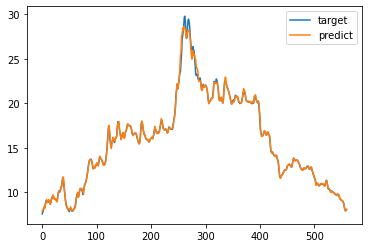

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.06533593787715612
mean_absolute_error is :  0.13660106570485264
r2_score is :  0.9973889044598064


### Rolling with window 7

In [ ]:
train_rolling_7 = train_save.rolling(window=7).mean()
train_rolling_7.dropna(inplace=True)
train_rolling_7.reset_index(inplace=True)
train_rolling_7.drop("index", axis=1,inplace=True)
train_rolling_7

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020011e+07,7.682857,7.972857,7.555714,7.812857,7.660000,0.152857,1.992057,602688.021429,469810.615714,7.938571
1,2.020011e+07,7.821429,8.084286,7.674286,7.938571,7.812857,0.125714,1.614186,609013.628571,480493.754143,8.114286
2,2.020011e+07,7.934286,8.257143,7.792857,8.114286,7.938571,0.175714,2.203543,680377.651429,549150.332143,8.357143
3,2.020011e+07,8.114286,8.475714,7.970000,8.357143,8.114286,0.242857,2.964686,738702.804286,613652.001000,8.560000
4,2.020011e+07,8.371429,8.727143,8.162857,8.560000,8.357143,0.202857,2.490529,797383.602857,676453.608000,8.697143
...,...,...,...,...,...,...,...,...,...,...,...
551,2.022042e+07,9.035714,9.108571,8.874286,8.954286,9.035714,-0.081429,-0.900157,139272.970000,124558.126000,8.745714
552,2.022042e+07,8.928571,8.982857,8.672857,8.745714,8.954286,-0.208571,-2.372300,161140.784286,139971.905286,8.575714
553,2.022042e+07,8.740000,8.834286,8.500000,8.575714,8.745714,-0.170000,-1.920586,196311.087143,166298.796571,8.438571
554,2.022042e+07,8.555714,8.692857,8.320000,8.438571,8.575714,-0.137143,-1.521729,221572.457143,184600.667429,8.278571


In [ ]:
train_rolling_7 = setup_cv(train_rolling_7)

In [ ]:
lgbm_models = train_lgbm(train_rolling_7, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.358118	valid_1's rmse: 0.598495
[200]	training's rmse: 0.258639	valid_1's rmse: 0.599712
[300]	training's rmse: 0.214562	valid_1's rmse: 0.607979
[400]	training's rmse: 0.190231	valid_1's rmse: 0.581608
[500]	training's rmse: 0.172699	valid_1's rmse: 0.569394
[600]	training's rmse: 0.161385	valid_1's rmse: 0.552225
[700]	training's rmse: 0.148797	valid_1's rmse: 0.546775
[800]	training's rmse: 0.141536	valid_1's rmse: 0.540814
[900]	training's rmse: 0.13519	valid_1's rmse: 0.533108
[1000]	training's rmse: 0.129907	valid_1's rmse: 0.525023
Did not meet early stopping. Best iteration is:
[997]	training's rmse: 0.129874	valid_1's rmse: 0.524712
oof_score of Validation Data is:  0.5247118754801782
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.362673	valid_1's rmse: 0.387771
[200]	training's rmse: 0.291909	valid_1's rmse: 0.332489
[300]	training's rmse: 0.250

In [ ]:
X_train_eva = train_rolling_7.loc[:, train_rolling_7.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_7[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
0,7.938571,8.239712
1,8.114286,8.296666
2,8.357143,8.400583
3,8.560000,8.653636
4,8.697143,8.657015
...,...,...
551,8.745714,8.688087
552,8.575714,8.442446
553,8.438571,8.300166
554,8.278571,8.271741


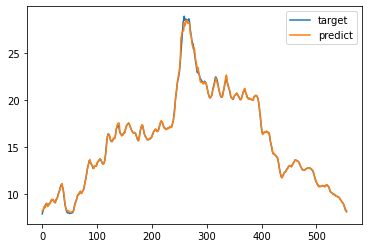

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.02911908328573957
mean_absolute_error is :  0.0924586932961195
r2_score is :  0.9988137470971822


### Rolling with window 30

In [ ]:
train_rolling_30 = train_save.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,8.847667
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,8.915667
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,9.015000
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,9.094333
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,9.158000
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.584667
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.501333
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.418667
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.350333


In [ ]:
train_rolling_30 = setup_cv(train_rolling_30)

In [ ]:
lgbm_models = train_lgbm(train_rolling_30, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.216569	valid_1's rmse: 0.220466
[200]	training's rmse: 0.166814	valid_1's rmse: 0.242535
[300]	training's rmse: 0.145136	valid_1's rmse: 0.246614
[400]	training's rmse: 0.129036	valid_1's rmse: 0.240086
[500]	training's rmse: 0.117391	valid_1's rmse: 0.23933
[600]	training's rmse: 0.110382	valid_1's rmse: 0.235294
[700]	training's rmse: 0.103836	valid_1's rmse: 0.227203
[800]	training's rmse: 0.0975555	valid_1's rmse: 0.224867
[900]	training's rmse: 0.0934008	valid_1's rmse: 0.217948
[1000]	training's rmse: 0.0904524	valid_1's rmse: 0.21243
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0904524	valid_1's rmse: 0.21243
oof_score of Validation Data is:  0.21242960977842498
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.20578	valid_1's rmse: 0.331575
[200]	training's rmse: 0.148876	valid_1's rmse: 0.280516
[300]	training's rmse: 0.

In [ ]:
X_train_eva = train_rolling_30.loc[:, train_rolling_30.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_30[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_test_test

,target,predict
0,8.847667,8.953302
1,8.915667,8.986354
2,9.015000,9.082289
3,9.094333,9.146629
4,9.158000,9.138887
...,...,...
528,9.584667,9.596119
529,9.501333,9.505615
530,9.418667,9.397806
531,9.350333,9.305622


In [ ]:
y_test_test.to_csv("LGBM_Predict_Best_to_Andi.csv")

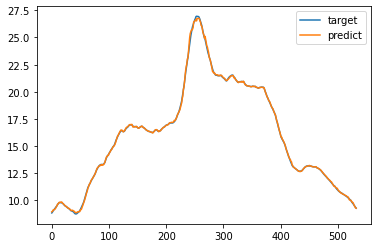

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.005925626261102908
mean_absolute_error is :  0.04608953970027
r2_score is :  0.9997328777450211


## Multiple Targets

In [ ]:
train_2020_2021 = pd.read_csv("/content/drive/MyDrive/FC_Project/data/Train_JF.csv")
train_2022 = pd.read_csv("/content/drive/MyDrive/FC_Project/data/Test_JF.csv")

In [ ]:
train_2022 = train_2022.sort_index(axis=0,ascending=False)
train_2020_2021 = train_2020_2021.sort_index(axis=0,ascending=False)
train = pd.concat([train_2020_2021, train_2022], axis=0)

### Handle Nulls

In [ ]:
train = train.drop("Unnamed: 0", axis=1)
train = train.drop("ts_code", axis=1)
train = train.dropna()
train.isnull().sum()
train.reset_index(inplace=True)
train = train.drop("index", axis=1)

In [ ]:
train_save = train
train_minus_1 = train[:-1]

### Predict multiple target_open

In [ ]:
target_open = train_save['open'][1:]
train_minus_1['target'] = list(target_open)
train_minus_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.50
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.44
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.56
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,7.63
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.24
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,8.47
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,7.89
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,7.80
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,8.04


In [ ]:
train_rolling_30 = train_minus_1.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,8.766667
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,8.830667
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,8.896000
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,8.997333
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,9.086000
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.662000
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.584333
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.498000
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.414333


In [ ]:
train_rolling_30 = setup_cv(train_rolling_30)

In [ ]:
lgbm_models = train_lgbm(train_rolling_30, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.213643	valid_1's rmse: 0.271791
[200]	training's rmse: 0.163678	valid_1's rmse: 0.280167
[300]	training's rmse: 0.141483	valid_1's rmse: 0.274071
[400]	training's rmse: 0.124119	valid_1's rmse: 0.261102
[500]	training's rmse: 0.112296	valid_1's rmse: 0.253517
[600]	training's rmse: 0.104306	valid_1's rmse: 0.248273
[700]	training's rmse: 0.0965348	valid_1's rmse: 0.237851
[800]	training's rmse: 0.0915606	valid_1's rmse: 0.237881
[900]	training's rmse: 0.0868416	valid_1's rmse: 0.227364
[1000]	training's rmse: 0.0838541	valid_1's rmse: 0.223825
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0838541	valid_1's rmse: 0.223825
oof_score of Validation Data is:  0.22382556018356714
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.20714	valid_1's rmse: 0.292239
[200]	training's rmse: 0.15227	valid_1's rmse: 0.245996
[300]	training's rmse:

In [ ]:
X_train_eva = train_rolling_30.loc[:, train_rolling_30.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_30[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_predict_open = y_test_test.rename(columns={'target': 'open_target', 'predict': 'open_predict'})
y_predict_open

,open_target,open_predict
0,8.766667,8.902094
1,8.830667,8.917951
2,8.896000,8.992146
3,8.997333,9.036980
4,9.086000,9.066617
...,...,...
528,9.662000,9.652763
529,9.584333,9.574246
530,9.498000,9.471906
531,9.414333,9.367390


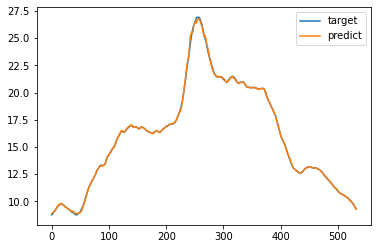

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.00607406109482388
mean_absolute_error is :  0.04531192671284496
r2_score is :  0.999725720069416


### Predict multiple target_high

In [ ]:
target_open = train_save['high'][1:]
train_minus_1['target'] = list(target_open)
train_minus_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.77
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.73
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.74
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.24
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.24
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,8.47
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,8.24
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,8.10
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,8.18


In [ ]:
train_rolling_30 = train_minus_1.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,9.092333
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,9.155000
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,9.248333
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,9.359667
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,9.430667
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.767667
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.695000
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.600000
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.521000


In [ ]:
train_rolling_30 = setup_cv(train_rolling_30)

In [ ]:
lgbm_models = train_lgbm(train_rolling_30, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.217876	valid_1's rmse: 0.294124
[200]	training's rmse: 0.163649	valid_1's rmse: 0.325476
[300]	training's rmse: 0.138708	valid_1's rmse: 0.298624
[400]	training's rmse: 0.121195	valid_1's rmse: 0.271998
[500]	training's rmse: 0.106662	valid_1's rmse: 0.259715
[600]	training's rmse: 0.0992508	valid_1's rmse: 0.261869
[700]	training's rmse: 0.0907118	valid_1's rmse: 0.24784
[800]	training's rmse: 0.0850124	valid_1's rmse: 0.241648
[900]	training's rmse: 0.0813836	valid_1's rmse: 0.234773
[1000]	training's rmse: 0.0786471	valid_1's rmse: 0.237756
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0786471	valid_1's rmse: 0.237756
oof_score of Validation Data is:  0.23775571566673875
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.23401	valid_1's rmse: 0.305305
[200]	training's rmse: 0.174639	valid_1's rmse: 0.253752
[300]	training's rmse

In [ ]:
X_train_eva = train_rolling_30.loc[:, train_rolling_30.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_30[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_predict_high = y_test_test.rename(columns={'target': 'high_target', 'predict': 'high_predict'})
y_predict_high

,high_target,high_predict
0,9.092333,9.199925
1,9.155000,9.206544
2,9.248333,9.330455
3,9.359667,9.395401
4,9.430667,9.418800
...,...,...
528,9.767667,9.828044
529,9.695000,9.709858
530,9.600000,9.590298
531,9.521000,9.513755


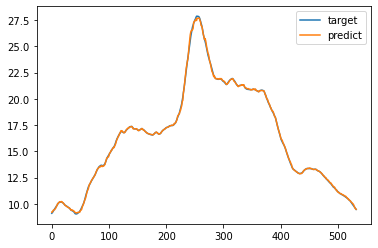

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.005932281633528198
mean_absolute_error is :  0.04702690165724487
r2_score is :  0.999745398882943


### Predict multiple target_low

In [ ]:
target_open = train_save['low'][1:]
train_minus_1['target'] = list(target_open)
train_minus_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.44
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.41
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.51
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,7.48
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,7.90
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,7.78
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,7.86
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,7.65
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,7.82


In [ ]:
train_rolling_30 = train_minus_1.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,8.571667
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,8.632333
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,8.696333
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,8.776333
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,8.851000
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.468333
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.398000
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.307667
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.236333


In [ ]:
train_rolling_30 = setup_cv(train_rolling_30)

In [ ]:
lgbm_models = train_lgbm(train_rolling_30, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.200555	valid_1's rmse: 0.242754
[200]	training's rmse: 0.156925	valid_1's rmse: 0.253264
[300]	training's rmse: 0.137217	valid_1's rmse: 0.263347
[400]	training's rmse: 0.125036	valid_1's rmse: 0.251989
[500]	training's rmse: 0.114161	valid_1's rmse: 0.242557
[600]	training's rmse: 0.107208	valid_1's rmse: 0.241582
[700]	training's rmse: 0.100839	valid_1's rmse: 0.236593
[800]	training's rmse: 0.0954161	valid_1's rmse: 0.236704
[900]	training's rmse: 0.0910781	valid_1's rmse: 0.230154
[1000]	training's rmse: 0.0881943	valid_1's rmse: 0.22312
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0881943	valid_1's rmse: 0.22312
oof_score of Validation Data is:  0.2231203073200128
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.199185	valid_1's rmse: 0.26246
[200]	training's rmse: 0.140602	valid_1's rmse: 0.230896
[300]	training's rmse: 0.

In [ ]:
X_train_eva = train_rolling_30.loc[:, train_rolling_30.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_30[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_predict_low = y_test_test.rename(columns={'target': 'low_target', 'predict': 'low_predict'})
y_predict_low

,low_target,low_predict
0,8.571667,8.688171
1,8.632333,8.706722
2,8.696333,8.784354
3,8.776333,8.845518
4,8.851000,8.853439
...,...,...
528,9.468333,9.455583
529,9.398000,9.370061
530,9.307667,9.288081
531,9.236333,9.187090


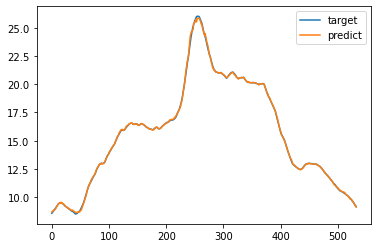

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.005619317174709423
mean_absolute_error is :  0.04471204284347939
r2_score is :  0.9997318397356456


### Predict multiple target_close

In [ ]:
target_open = train_save['close'][1:]
train_minus_1['target'] = list(target_open)
train_minus_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,20200102,7.33,7.59,7.25,7.49,7.28,0.21,2.8846,466108.30,346083.230,7.53
1,20200103,7.50,7.77,7.44,7.53,7.49,0.04,0.5340,412638.85,312790.193,7.55
2,20200106,7.44,7.73,7.41,7.55,7.53,0.02,0.2656,555795.82,419199.780,7.67
3,20200107,7.56,7.74,7.51,7.67,7.55,0.12,1.5894,430260.02,327139.162,8.04
4,20200108,7.63,8.24,7.48,8.04,7.67,0.37,4.8240,965812.58,759945.697,8.06
...,...,...,...,...,...,...,...,...,...,...,...
557,20220422,8.64,8.73,8.40,8.57,8.64,-0.07,-0.8102,179261.76,152963.058,7.79
558,20220425,8.47,8.47,7.78,7.79,8.57,-0.78,-9.1015,290016.33,234874.403,7.91
559,20220426,7.89,8.24,7.86,7.91,7.79,0.12,1.5404,370102.93,297927.075,8.07
560,20220427,7.80,8.10,7.65,8.07,7.91,0.16,2.0228,280421.79,221401.511,7.91


In [ ]:
train_rolling_30 = train_minus_1.rolling(window=30).mean()
train_rolling_30.dropna(inplace=True)
train_rolling_30.reset_index(inplace=True)
train_rolling_30.drop("index", axis=1,inplace=True)
train_rolling_30

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,target
0,2.020016e+07,8.711000,9.037667,8.518000,8.791000,8.733667,0.057333,0.785820,9.026582e+05,801100.055367,8.847667
1,2.020016e+07,8.766667,9.092333,8.571667,8.847667,8.791000,0.056667,0.760037,9.157653e+05,815484.153267,8.915667
2,2.020017e+07,8.830667,9.155000,8.632333,8.915667,8.847667,0.068000,0.880067,9.448911e+05,845644.831067,9.015000
3,2.020017e+07,8.896000,9.248333,8.696333,9.015000,8.915667,0.099333,1.205590,1.004631e+06,911954.342700,9.094333
4,2.020017e+07,8.997333,9.359667,8.776333,9.094333,9.015000,0.079333,1.000663,1.064208e+06,978774.173767,9.158000
...,...,...,...,...,...,...,...,...,...,...,...
528,2.022036e+07,9.733000,9.840000,9.553000,9.669000,9.728000,-0.059000,-0.609437,1.891018e+05,185227.558167,9.584667
529,2.022037e+07,9.662000,9.767667,9.468333,9.584667,9.669000,-0.084333,-0.906373,1.917968e+05,185770.866933,9.501333
530,2.022037e+07,9.584333,9.695000,9.398000,9.501333,9.584667,-0.083333,-0.884097,1.967318e+05,188155.818233,9.418667
531,2.022038e+07,9.498000,9.600000,9.307667,9.418667,9.501333,-0.082667,-0.861500,1.935763e+05,182147.356533,9.350333


In [ ]:
train_rolling_30 = setup_cv(train_rolling_30)

In [ ]:
lgbm_models = train_lgbm(train_rolling_30, 5)

Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.216569	valid_1's rmse: 0.220466
[200]	training's rmse: 0.166814	valid_1's rmse: 0.242535
[300]	training's rmse: 0.145136	valid_1's rmse: 0.246614
[400]	training's rmse: 0.129036	valid_1's rmse: 0.240086
[500]	training's rmse: 0.117391	valid_1's rmse: 0.23933
[600]	training's rmse: 0.110382	valid_1's rmse: 0.235294
[700]	training's rmse: 0.103836	valid_1's rmse: 0.227203
[800]	training's rmse: 0.0975555	valid_1's rmse: 0.224867
[900]	training's rmse: 0.0934008	valid_1's rmse: 0.217948
[1000]	training's rmse: 0.0904524	valid_1's rmse: 0.21243
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.0904524	valid_1's rmse: 0.21243
oof_score of Validation Data is:  0.21242960977842498
Training until validation scores don't improve for 10000 rounds.
[100]	training's rmse: 0.20578	valid_1's rmse: 0.331575
[200]	training's rmse: 0.148876	valid_1's rmse: 0.280516
[300]	training's rmse: 0.

In [ ]:
X_train_eva = train_rolling_30.loc[:, train_rolling_30.columns != 'target']
X_train_eva = X_train_eva.loc[:, X_train_eva.columns != 'fold']
y_train_eva = train_rolling_30[["target"]]

In [ ]:
lgbm_preds = list()
for model in lgbm_models:
    lgbm_preds.append(model.predict(X_train_eva))
lgbm_preds = np.mean(lgbm_preds, axis=0)

In [ ]:
y_test_test = y_train_eva.copy()
y_test_test['predict'] = lgbm_preds
y_predict_close = y_test_test.rename(columns={'target': 'close_target', 'predict': 'close_predict'})
y_predict_close

,close_target,close_predict
0,8.847667,8.953302
1,8.915667,8.986354
2,9.015000,9.082289
3,9.094333,9.146629
4,9.158000,9.138887
...,...,...
528,9.584667,9.596119
529,9.501333,9.505615
530,9.418667,9.397806
531,9.350333,9.305622


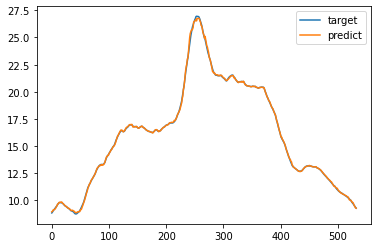

In [ ]:
import matplotlib.pyplot as plt
y_test_test.plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("mean_squared_error is : ", mean_squared_error(y_train_eva,lgbm_preds))
print("mean_absolute_error is : ", mean_absolute_error(y_train_eva,lgbm_preds))
print("r2_score is : ", r2_score(y_train_eva,lgbm_preds))

mean_squared_error is :  0.005925626261102908
mean_absolute_error is :  0.04608953970027
r2_score is :  0.9997328777450211


### Save Results

In [ ]:
y_multiple_target = y_predict_open

y_multiple_target['high_target'] = y_predict_high['high_target']
y_multiple_target['high_predict'] = y_predict_high['high_predict']

y_multiple_target['low_target'] = y_predict_low['low_target']
y_multiple_target['low_predict'] = y_predict_low['low_predict']

y_multiple_target['close_target'] = y_predict_close['close_target']
y_multiple_target['close_predict'] = y_predict_close['close_predict']

y_multiple_target

,open_target,open_predict,high_target,high_predict,low_target,low_predict,close_target,close_predict
0,8.766667,8.902094,9.092333,9.199925,8.571667,8.688171,8.847667,8.953302
1,8.830667,8.917951,9.155000,9.206544,8.632333,8.706722,8.915667,8.986354
2,8.896000,8.992146,9.248333,9.330455,8.696333,8.784354,9.015000,9.082289
3,8.997333,9.036980,9.359667,9.395401,8.776333,8.845518,9.094333,9.146629
4,9.086000,9.066617,9.430667,9.418800,8.851000,8.853439,9.158000,9.138887
...,...,...,...,...,...,...,...,...
528,9.662000,9.652763,9.767667,9.828044,9.468333,9.455583,9.584667,9.596119
529,9.584333,9.574246,9.695000,9.709858,9.398000,9.370061,9.501333,9.505615
530,9.498000,9.471906,9.600000,9.590298,9.307667,9.288081,9.418667,9.397806
531,9.414333,9.367390,9.521000,9.513755,9.236333,9.187090,9.350333,9.305622


In [ ]:
y_multiple_target.to_csv("LGBM_Predict_Multiple_Targets_to_Sunny.csv")